In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target

print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [2]:
# with this I have loaded the iris dataset into the jupyter notebook ; this is an inbuilt dataset with the sklearn

In [3]:
# first ,let's see what type of data do I have
print(iris_df.info())

print(iris_df.describe())

print(iris_df['target'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [4]:
# atleast I don't see any missing data points but let's see

In [7]:
print(iris_df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [8]:
print(iris_df.duplicated().sum())

1


In [9]:
# there is only one duplicated set but lets drop it

In [10]:
iris_df = iris_df.drop_duplicates()

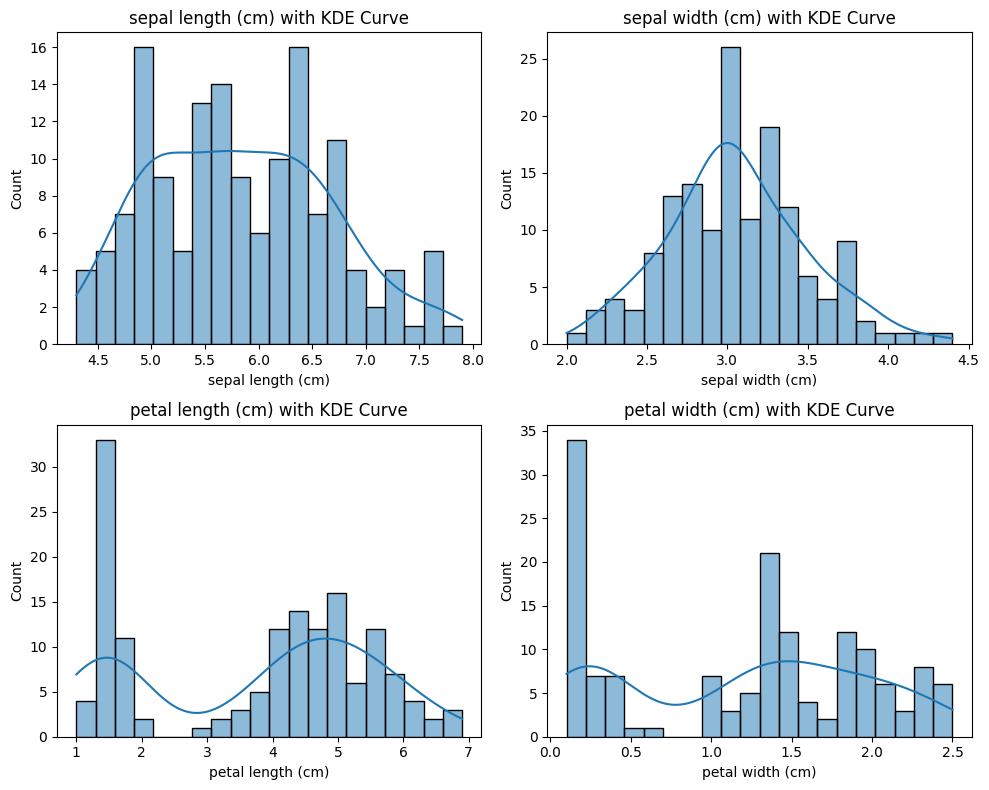

In [12]:
# this step is called univariate analysis
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris_df[feature], kde=True, bins=20)
    plt.title(f'{feature} with KDE Curve')

plt.tight_layout()
plt.show()


In [13]:
# atleast I currently can't see three different sets of data in this 

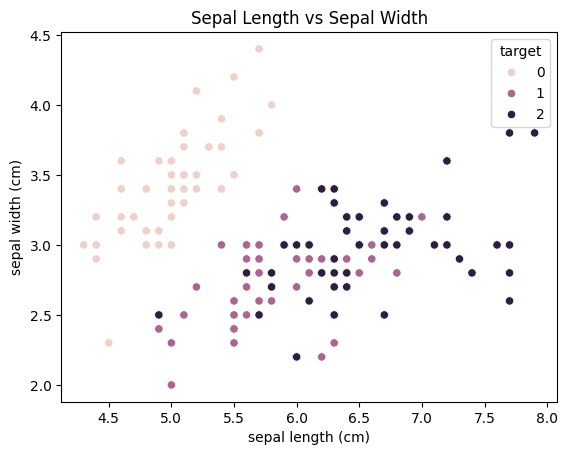

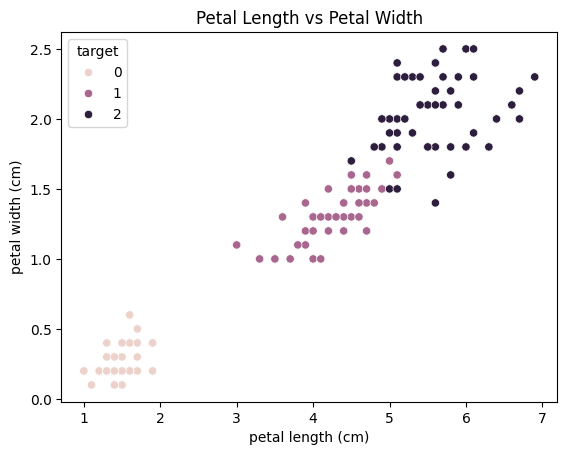

In [14]:
# scatter plot for visulaizing the relation between two field;bivariate analysis
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=iris_df['target'])
plt.title('Sepal Length vs Sepal Width')
plt.show()

sns.scatterplot(x=iris_df['petal length (cm)'], y=iris_df['petal width (cm)'], hue=iris_df['target'])
plt.title('Petal Length vs Petal Width')
plt.show()


In [15]:
# now I see it a little clearly


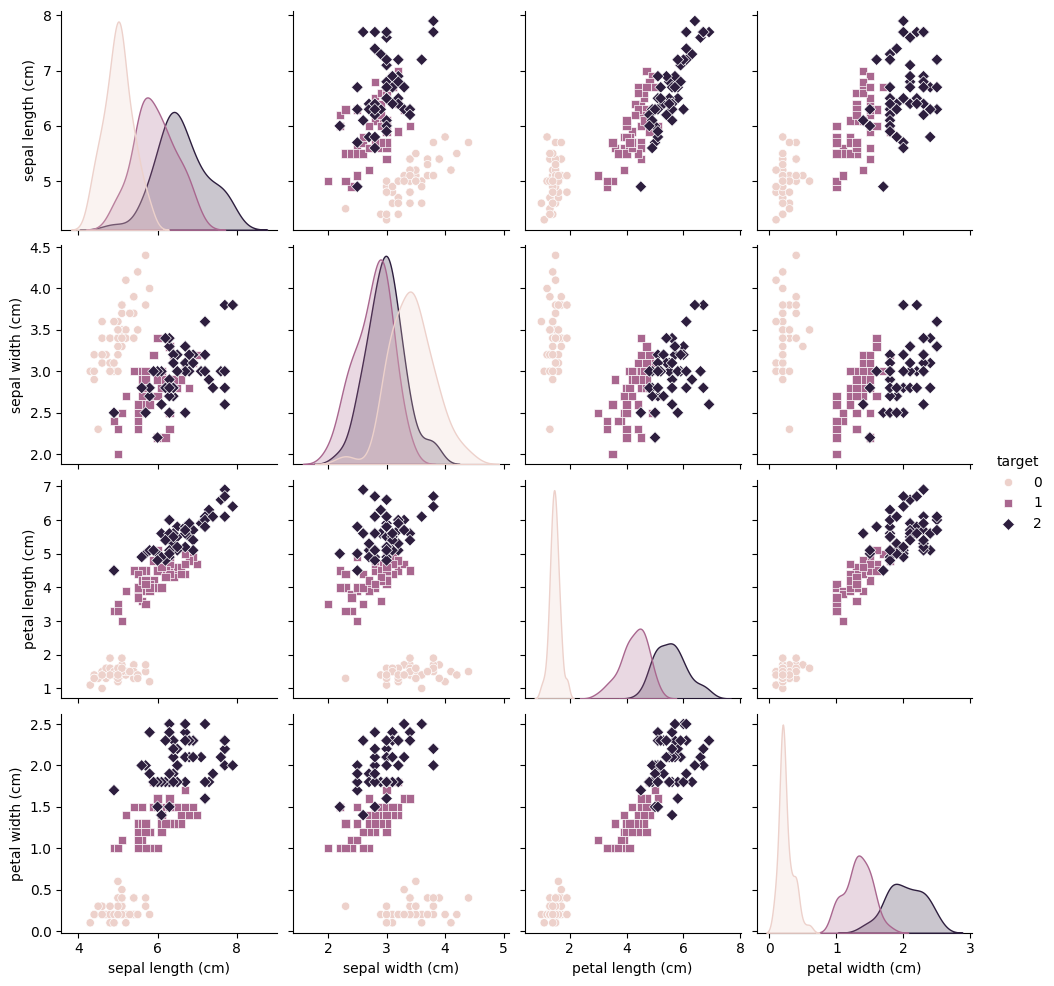

In [16]:
# pair plot for multivariate analysis
sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"])
plt.show()

In [17]:
# now I see it a little too clearly

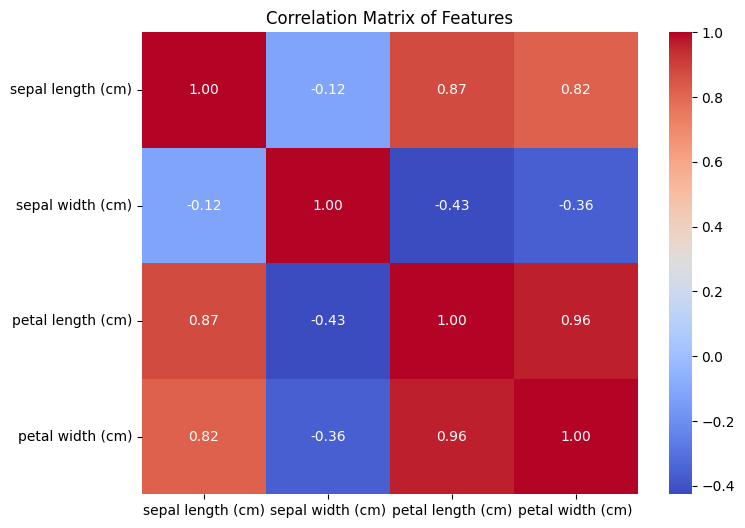

In [18]:
correlation_matrix = iris_df.iloc[:, :-1].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()


In [19]:
# Whoever created those heatmaps was a lifesaver.........

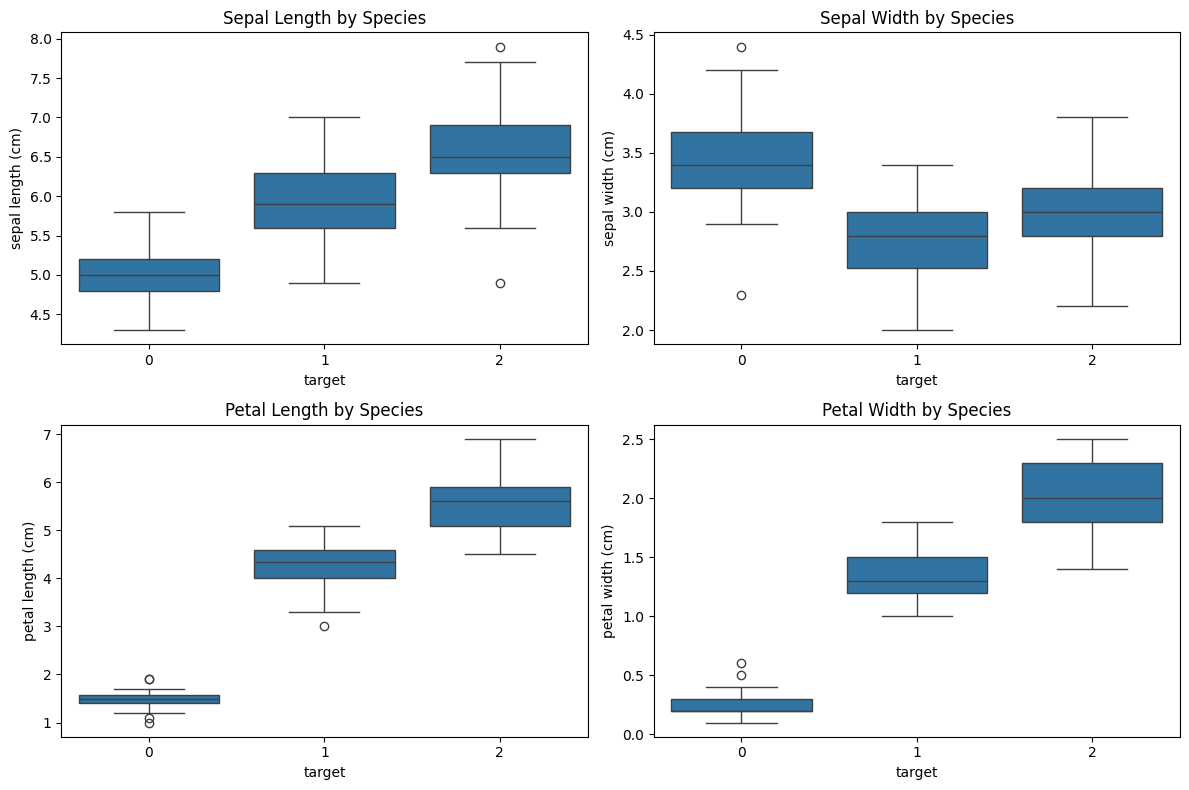

In [20]:
# Box plot
plt.figure(figsize=(12, 8))

# Box plot for sepal length
plt.subplot(2, 2, 1)
sns.boxplot(x='target', y='sepal length (cm)', data=iris_df)
plt.title('Sepal Length by Species')

# Box plot for sepal width
plt.subplot(2, 2, 2)
sns.boxplot(x='target', y='sepal width (cm)', data=iris_df)
plt.title('Sepal Width by Species')

# Box plot for petal length
plt.subplot(2, 2, 3)
sns.boxplot(x='target', y='petal length (cm)', data=iris_df)
plt.title('Petal Length by Species')

# Box plot for petal width
plt.subplot(2, 2, 4)
sns.boxplot(x='target', y='petal width (cm)', data=iris_df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()


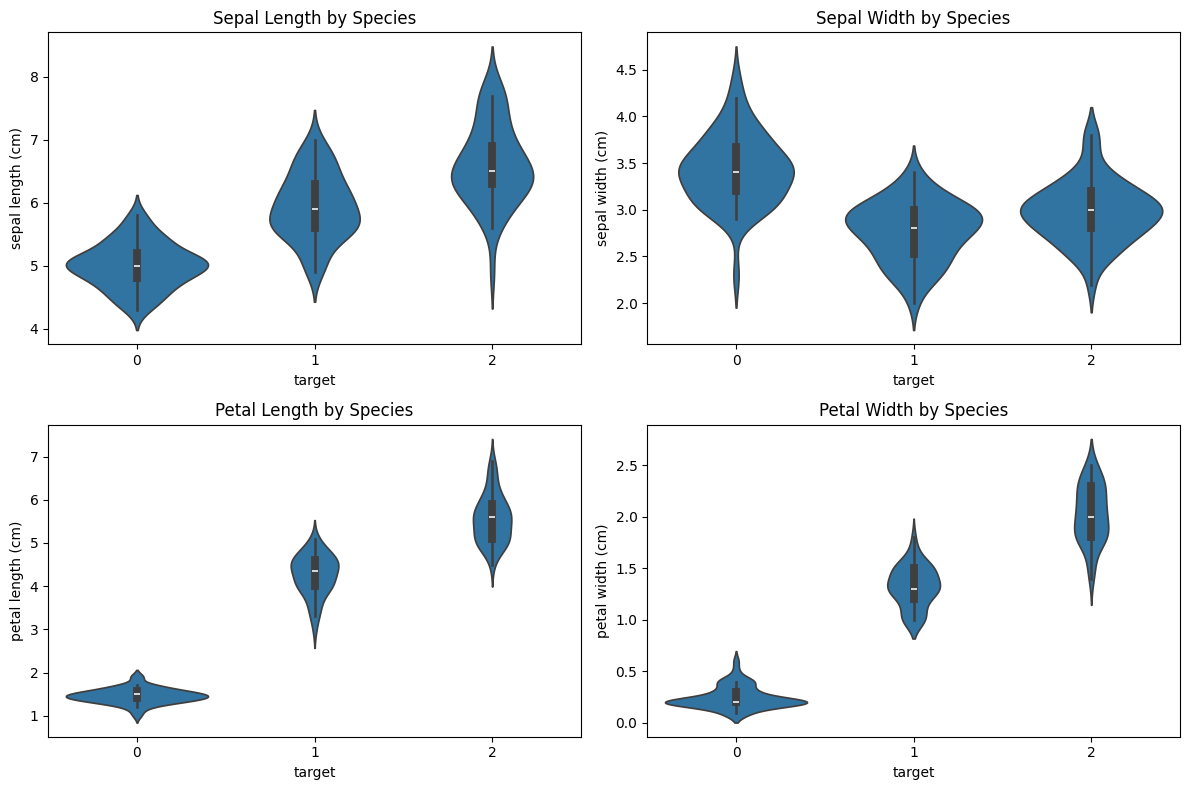

In [21]:
# violin plot
plt.figure(figsize=(12, 8))

# Violin plot for sepal length
plt.subplot(2, 2, 1)
sns.violinplot(x='target', y='sepal length (cm)', data=iris_df)
plt.title('Sepal Length by Species')

# Violin plot for sepal width
plt.subplot(2, 2, 2)
sns.violinplot(x='target', y='sepal width (cm)', data=iris_df)
plt.title('Sepal Width by Species')

# Violin plot for petal length
plt.subplot(2, 2, 3)
sns.violinplot(x='target', y='petal length (cm)', data=iris_df)
plt.title('Petal Length by Species')

# Violin plot for petal width
plt.subplot(2, 2, 4)
sns.violinplot(x='target', y='petal width (cm)', data=iris_df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()


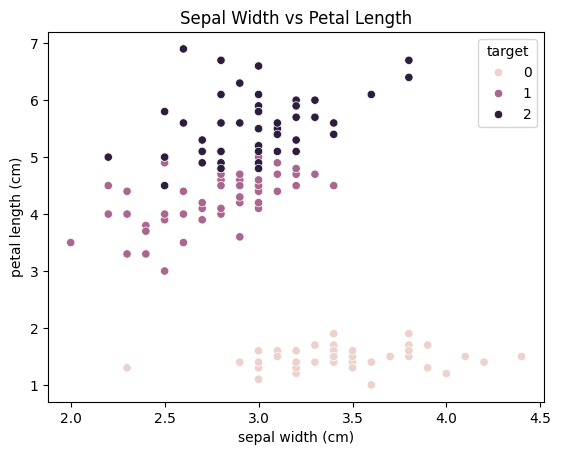

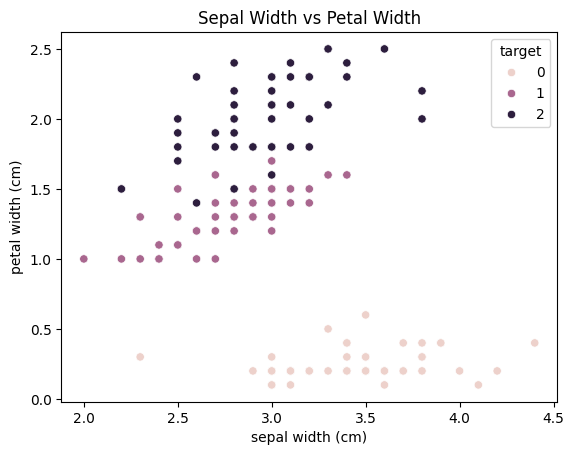

In [22]:
# I personally don't think that sepal width can be used to segregate the species but lets see
sns.scatterplot(x=iris_df['sepal width (cm)'], y=iris_df['petal length (cm)'], hue=iris_df['target'])
plt.title('Sepal Width vs Petal Length')
plt.show()

sns.scatterplot(x=iris_df['sepal width (cm)'], y=iris_df['petal width (cm)'], hue=iris_df['target'])
plt.title('Sepal Width vs Petal Width')
plt.show()

In [23]:
# Well there certainly is correlation but using it would give many errors

In [24]:
# the analysis is over now lets do model preparation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X = iris_df.iloc[:, :-1]
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [25]:
# even I didn't think that the result could be this good